In [137]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [138]:
import numpy as np
import matplotlib.pyplot as plt
from TFGDCANDECOMP import TFGDCANDECOMP
from NPALSCANDECOMP import NPALSCANDECOMP
from TFADAMCANDECOMP import TFADAMCANDECOMP

In [31]:
def reconstitute(s,A,B,C):
    return np.einsum('r,ir,jr,kr->ijk', s, A, B, C)

In [140]:
A_true = np.random.randn(4,3)
B_true = np.random.randn(4,3)
C_true = np.random.randn(4,3)
X = np.einsum('ir,jr,kr->ijk', A_true, B_true, C_true)

In [59]:
X.shape

(4, 4, 4)

In [82]:
KR(A_true,B_true).shape

(16, 2)

In [174]:
s, A_out, B_out, C_out, errors = NPALSCANDECOMP(X,3)
print errors[-1]

0.345434852601


In [175]:
Y=reconstitute(s,A_out,B_out,C_out)

In [176]:
X

array([[[  8.96188091e-01,   6.55043222e-01,   8.16015235e-01,
           2.45529433e-01],
        [ -1.96004592e-01,  -1.51332738e+00,  -8.06070032e-01,
          -5.02270642e-01],
        [  4.13588987e-01,  -7.17375963e-02,   4.52807090e-01,
          -3.45731520e-02],
        [ -2.29040326e-01,  -1.12625716e+00,  -6.90060522e-01,
          -3.72343747e-01]],

       [[ -9.88305424e-02,  -7.38543075e-01,  -3.63577891e-01,
          -2.48479485e-01],
        [ -9.85207470e-01,   6.06168329e+00,   1.38419059e+00,
           2.03525405e+00],
        [ -4.75752982e-01,   1.54557877e+00,   1.71510014e-01,
           5.16511024e-01],
        [ -6.52853150e-01,   4.27093521e+00,   1.00888685e+00,
           1.43441900e+00]],

       [[  1.25331990e+00,   3.13853108e-01,   7.49670285e-01,
           1.58075806e-01],
        [ -9.30571478e-01,   2.91494463e+00,   7.98054724e-02,
           9.96031328e-01],
        [  1.95462746e-03,   1.08027324e+00,   7.02308578e-01,
           3.32571559e-

In [177]:
Y

array([[[  7.87304790e-01,  -1.61083075e-01,   4.93073138e-01,
          -3.71164021e-02],
        [ -3.95047726e-01,  -1.27011035e+00,  -7.32964144e-01,
          -4.37371655e-01],
        [  4.09211769e-01,  -5.69895714e-01,   8.15426782e-02,
          -1.83393978e-01],
        [ -1.16112507e-01,  -4.32175584e-01,  -2.36590138e-01,
          -1.48421486e-01]],

       [[  7.53951003e-02,  -1.96855184e-01,  -1.69931483e-02,
          -6.48965264e-02],
        [ -7.35415095e-01,   6.24673037e+00,   1.74072970e+00,
           2.09135806e+00],
        [ -2.11429001e-01,   2.11814122e+00,   6.17716129e-01,
           7.09874465e-01],
        [ -2.46593132e-01,   2.10310867e+00,   5.86787594e-01,
           7.04123840e-01]],

       [[  5.78444708e-01,  -1.83067234e-01,   3.39368278e-01,
          -4.91516206e-02],
        [ -5.41114051e-01,   1.36658476e+00,   1.16173616e-01,
           4.49039917e-01],
        [  2.10527873e-01,   3.66464029e-01,   2.80625974e-01,
           1.28148246e-

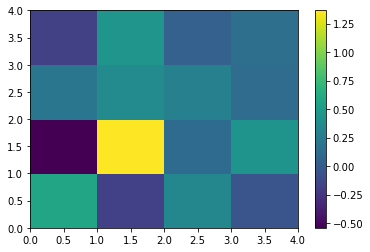

In [179]:
plt.pcolor(Y[2])
plt.colorbar()

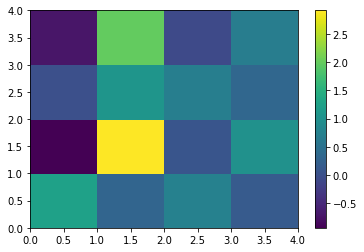

In [180]:
plt.pcolor(X[2])
plt.colorbar()

In [152]:
A_out

array([[ 0.34962574, -0.34966063, -0.30453736],
       [ 0.74084041, -0.7408158 , -0.77093811],
       [ 0.51241814, -0.5124337 , -0.49168924],
       [ 0.25757519, -0.25756765, -0.26674543]])

In [154]:
A_true

array([[-0.82410429,  0.4483718 ,  0.08664174],
       [ 0.25453207, -2.20399203,  0.00462517],
       [-0.83922848, -1.17616834,  0.20327236],
       [ 0.82447701, -0.08685454, -1.18698358]])

In [155]:
B_out


array([[-0.34971404, -0.34974972, -0.30569873],
       [-0.74088009, -0.74085492, -0.77029685],
       [-0.51228183, -0.51229775, -0.49206556],
       [-0.25761232, -0.25760461, -0.26657558]])

In [157]:
B_true

array([[-1.07747856, -0.14870392, -1.79567786],
       [ 0.77310672,  1.48025839, -0.85906879],
       [-0.72158303,  0.40864698,  1.29396832],
       [ 0.71488547,  1.03720045, -0.83805664]])

In [158]:
C_true

array([[ 0.81948915,  0.35291325, -1.23440287],
       [ 0.52417582, -1.82585238, -0.43617748],
       [ 0.88371921, -0.37092172, -0.04230303],
       [ 0.18238138, -0.61250175, -0.27474296]])

In [159]:
C_out

array([[ 0.34783917,  0.34787446,  0.30329723],
       [ 0.74225391,  0.74222914,  0.7718551 ],
       [ 0.51135018,  0.51136596,  0.49084616],
       [ 0.25804659,  0.258039  ,  0.26705907]])

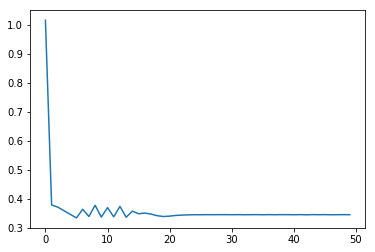

In [183]:
plt.plot(np.arange(len(errors[:50])), errors[:50])

In [184]:
errors[0]

1.0167537206539741

In [53]:
s, A_out, B_out, C_out, errors=TFGDCANDECOMP(X, 2)
print(errors[-1])

4.37427530257


In [100]:
a = np.random.randn(3,3)
b = np.random.randn(3,3)
c = np.random.randn(3,3)

In [101]:
d = np.vstack([a,b,c])

In [113]:
a = np.random.randn(3,3,3)

In [117]:
a[0,:,:]

array([[ 0.33477577,  0.73516376, -0.4998847 ],
       [-0.46269137, -0.15099122, -0.84064781],
       [ 0.14611607, -1.4009178 ,  1.04538776]])

In [114]:
a

array([[[ 0.33477577,  0.73516376, -0.4998847 ],
        [-0.46269137, -0.15099122, -0.84064781],
        [ 0.14611607, -1.4009178 ,  1.04538776]],

       [[ 1.77997843,  0.23833368,  1.19748234],
        [ 1.78604912,  0.79989029,  0.28435161],
        [ 0.32870673,  0.26786826, -1.11254461]],

       [[ 0.9083464 ,  0.60232589, -0.76276641],
        [ 0.26520348, -1.16181628, -0.84963512],
        [-0.99977988, -1.31406384,  0.24580542]]])

In [115]:
a[:,0,:]

array([[ 0.33477577,  0.73516376, -0.4998847 ],
       [ 1.77997843,  0.23833368,  1.19748234],
       [ 0.9083464 ,  0.60232589, -0.76276641]])

In [116]:
a[:,0,:].T

array([[ 0.33477577,  1.77997843,  0.9083464 ],
       [ 0.73516376,  0.23833368,  0.60232589],
       [-0.4998847 ,  1.19748234, -0.76276641]])

In [104]:
b

array([[-0.70877709,  0.76538051,  0.99385503],
       [ 0.58481432, -0.00554075, -0.66315536],
       [ 1.45840143, -0.34103246,  0.1728013 ]])

In [102]:
d

array([[-0.15107711, -0.83603289, -0.62147123],
       [ 0.37180529, -0.0428617 , -0.61938033],
       [ 0.90780905, -0.69124978,  0.34590339],
       [-0.70877709,  0.76538051,  0.99385503],
       [ 0.58481432, -0.00554075, -0.66315536],
       [ 1.45840143, -0.34103246,  0.1728013 ],
       [ 0.40902105, -1.26763347, -1.06252867],
       [ 0.77206898,  0.97532266,  1.37732756],
       [-0.05149544,  0.17028907,  0.16058295]])

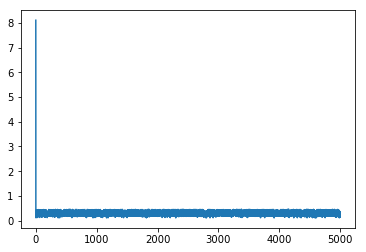

In [48]:
plt.plot(np.arange(len(errors)), errors)

In [54]:
s, A_out, B_out, C_out, errors=TFGDCANDECOMP(X, 2)
print(errors[-1])

2.92632180985
